In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#url = 'https://raw.githubusercontent.com/kaushalkrgupta02/Bharat-Intern-Data-Science/main/Task%201/tesla_stock_price.csv'
#df = pd.read_csv(url,encoding= 'unicode_escape')
df = pd.read_csv(r"C:\Users\Kaush\Documents\GitHub\Bharta_Intern_Data_Science\tesla_stock_price.csv")

In [6]:
df_Train = df[0:1600]
df_test = df[1600:]

In [7]:
df_Train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
1595,2016-10-27,14.089333,14.246667,13.443333,13.600667,13.600667,196405500
1596,2016-10-28,13.600000,13.688000,13.322000,13.331333,13.331333,64201500
1597,2016-10-31,13.499333,13.499333,13.054000,13.182000,13.182000,70384500
1598,2016-11-01,13.202667,13.233333,12.540667,12.719333,12.719333,105900000


In [8]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
1600,2016-11-03,12.600000,12.764667,12.469333,12.494667,12.494667,39795000
1601,2016-11-04,12.600000,12.897333,12.397333,12.704000,12.704000,77190000
1602,2016-11-07,12.906000,12.952667,12.670000,12.880667,12.880667,58051500
1603,2016-11-08,12.919333,13.166000,12.750667,12.996000,12.996000,49014000
1604,2016-11-09,12.458667,12.800000,12.263333,12.670667,12.670667,122596500
...,...,...,...,...,...,...,...
3157,2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
3158,2023-01-13,116.550003,122.629997,115.599998,122.400002,122.400002,180439300
3159,2023-01-17,125.699997,131.699997,125.019997,131.490005,131.490005,186477000
3160,2023-01-18,136.559998,136.679993,127.010002,128.779999,128.779999,195680300


In [9]:
train = df_Train.iloc[:, 4:5].values
test_actual = df_test.iloc[:, 4:5].values

In [10]:
##Considering closing value of stocks so extracting the close column
train

array([[ 1.592667],
       [ 1.588667],
       [ 1.464   ],
       ...,
       [13.182   ],
       [12.719333],
       [12.534667]])

In [11]:
test_actual

array([[ 12.494667],
       [ 12.704   ],
       [ 12.880667],
       ...,
       [131.490005],
       [128.779999],
       [127.169998]])

In [12]:
######NORmalizing the train values

from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler(feature_range = (0, 1))
training = mm_sc.fit_transform(train)

In [13]:
training

array([[0.02993639],
       [0.02971437],
       [0.02279457],
       ...,
       [0.67321646],
       [0.64753556],
       [0.63728545]])

In [14]:
X_train = []
y_train = []
for i in range(60, 1600):
    X_train.append(training[i-60:i, 0])
    y_train.append(training[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [15]:
X_train.shape

(1540, 60)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train

array([[[0.02993639],
        [0.02971437],
        [0.02279457],
        ...,
        [0.0194642 ],
        [0.0183911 ],
        [0.01506072]],

       [[0.02971437],
        [0.02279457],
        [0.01258143],
        ...,
        [0.0183911 ],
        [0.01506072],
        [0.01391358]],

       [[0.02279457],
        [0.01258143],
        [0.00114715],
        ...,
        [0.01506072],
        [0.01391358],
        [0.0159118 ]],

       ...,

       [[0.79273983],
        [0.77841923],
        [0.78922446],
        ...,
        [0.68990534],
        [0.69645508],
        [0.68150537]],

       [[0.77841923],
        [0.78922446],
        [0.77653201],
        ...,
        [0.69645508],
        [0.68150537],
        [0.67321646]],

       [[0.78922446],
        [0.77653201],
        [0.77379373],
        ...,
        [0.68150537],
        [0.67321646],
        [0.64753556]]])

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [19]:

Stock_pred = Sequential()

Stock_pred.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(LSTM(units = 60, return_sequences = True))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(LSTM(units = 60, return_sequences = True))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(LSTM(units = 60))
Stock_pred.add(Dropout(0.1))

Stock_pred.add(Dense(units = 1))

Stock_pred.compile(optimizer = 'adam', loss = 'mean_squared_error')
##Training the model
Stock_pred.fit(X_train, y_train, epochs = 25, batch_size = 16)

Epoch 1/25
97/97 [==============================] - 19s 121ms/step - loss: 0.0147
Epoch 2/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0045
Epoch 3/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0039
Epoch 4/25
97/97 [==============================] - 12s 120ms/step - loss: 0.0036
Epoch 5/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0034
Epoch 6/25
97/97 [==============================] - 11s 118ms/step - loss: 0.0036
Epoch 7/25
97/97 [==============================] - 11s 114ms/step - loss: 0.0028
Epoch 8/25
97/97 [==============================] - 12s 119ms/step - loss: 0.0026
Epoch 9/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0027
Epoch 10/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0022
Epoch 11/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0021
Epoch 12/25
97/97 [==============================] - 12s 121ms/step - loss: 0.0021
Epoch 13/25
9

In [20]:
test_head = train[-60:]


In [21]:
test_head

array([[15.043333],
       [14.994   ],
       [15.040667],
       [15.039333],
       [14.907333],
       [14.882667],
       [14.900667],
       [15.      ],
       [14.862   ],
       [14.989333],
       [14.841333],
       [14.730667],
       [14.666   ],
       [14.346667],
       [14.089333],
       [14.134   ],
       [13.384667],
       [13.185333],
       [13.522   ],
       [13.447333],
       [13.157333],
       [12.964667],
       [13.22    ],
       [13.07    ],
       [13.094   ],
       [13.361333],
       [13.693333],
       [13.756   ],
       [13.642667],
       [13.681333],
       [13.762   ],
       [13.83    ],
       [13.932667],
       [13.720667],
       [13.751333],
       [13.38    ],
       [13.602   ],
       [14.246667],
       [14.094   ],
       [13.897333],
       [13.4     ],
       [13.107333],
       [13.396667],
       [13.34    ],
       [13.434   ],
       [13.349333],
       [13.100667],
       [12.930667],
       [13.273333],
       [13.570667],


In [22]:
test_actual.shape

(1562, 1)

In [23]:
##For getting the 1st predicted value, we have o concatenate the last 60 time steps from the training dataset
test_head.shape

(60, 1)

In [24]:
Test = np.concatenate((test_head,test_actual), axis=0)


In [25]:
Test.shape

(1622, 1)

In [26]:
Test

array([[ 15.043333],
       [ 14.994   ],
       [ 15.040667],
       ...,
       [131.490005],
       [128.779999],
       [127.169998]])

In [27]:
Test = mm_sc.transform(Test)
X_test = []
for i in range(60, 152):
    X_test.append(Test[i-60:i, 0])
X_test = np.array(X_test)

In [28]:
X_test

array([[0.77653201, 0.77379373, 0.77638404, ..., 0.67321646, 0.64753556,
        0.63728545],
       [0.77379373, 0.77638404, 0.77630999, ..., 0.64753556, 0.63728545,
        0.6350652 ],
       [0.77638404, 0.77630999, 0.76898317, ..., 0.63728545, 0.6350652 ,
        0.64668448],
       ...,
       [0.67266139, 0.69083041, 0.69171851, ..., 0.84328751, 0.85246452,
        0.8962405 ],
       [0.69083041, 0.69171851, 0.71414302, ..., 0.85246452, 0.8962405 ,
        0.88784058],
       [0.69171851, 0.71414302, 0.71010961, ..., 0.8962405 , 0.88784058,
        0.91122707]])

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
X_test

array([[[0.77653201],
        [0.77379373],
        [0.77638404],
        ...,
        [0.67321646],
        [0.64753556],
        [0.63728545]],

       [[0.77379373],
        [0.77638404],
        [0.77630999],
        ...,
        [0.64753556],
        [0.63728545],
        [0.6350652 ]],

       [[0.77638404],
        [0.77630999],
        [0.76898317],
        ...,
        [0.63728545],
        [0.6350652 ],
        [0.64668448]],

       ...,

       [[0.67266139],
        [0.69083041],
        [0.69171851],
        ...,
        [0.84328751],
        [0.85246452],
        [0.8962405 ]],

       [[0.69083041],
        [0.69171851],
        [0.71414302],
        ...,
        [0.85246452],
        [0.8962405 ],
        [0.88784058]],

       [[0.69171851],
        [0.71414302],
        [0.71010961],
        ...,
        [0.8962405 ],
        [0.88784058],
        [0.91122707]]])

In [31]:
y_pred = Stock_pred.predict(X_test)
y_pred = mm_sc.inverse_transform(y_pred)

3/3 [==============================] - 2s 33ms/step


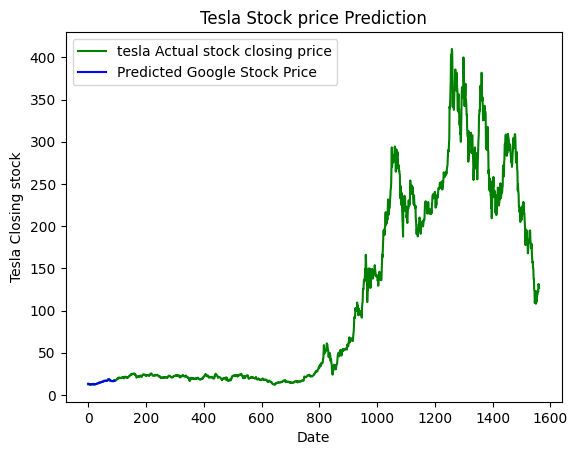

In [34]:
plt.plot(test_actual, color = 'Green', label = 'tesla Actual stock closing price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Tesla Stock price Prediction')
plt.xlabel('Date')
plt.ylabel('Tesla Closing stock')
plt.legend()
plt.show()